# Lorenz Equations

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation as FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress
from IPython.display import HTML

In [2]:
%matplotlib notebook

## Problem 1
Write a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = \frac{8}{3}$ . Make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. As usual, use `scipy .integrate.odeint` to compute the solution.

In [3]:
def lorenz(x,t):
    """Implements Lorenz equations:
    
    dx/dt = σ(y − x)
    dy/dt = ρx − y − xz
    dz/dt = xy − βz
        
    Parameters:
        x ((3,) ndarray): The state values (x,y,z)
        t (float): The time value t
    Returns:
        ((3,) ndarray): The derivative values
    """
    sigma, rho, beta = 10, 28, 8/3
    return np.array([sigma*(x[1] - x[0]), rho*x[0] - x[1] -x[0]*x[2], x[0]*x[1] - beta*x[2]])

<IPython.core.display.Javascript object>


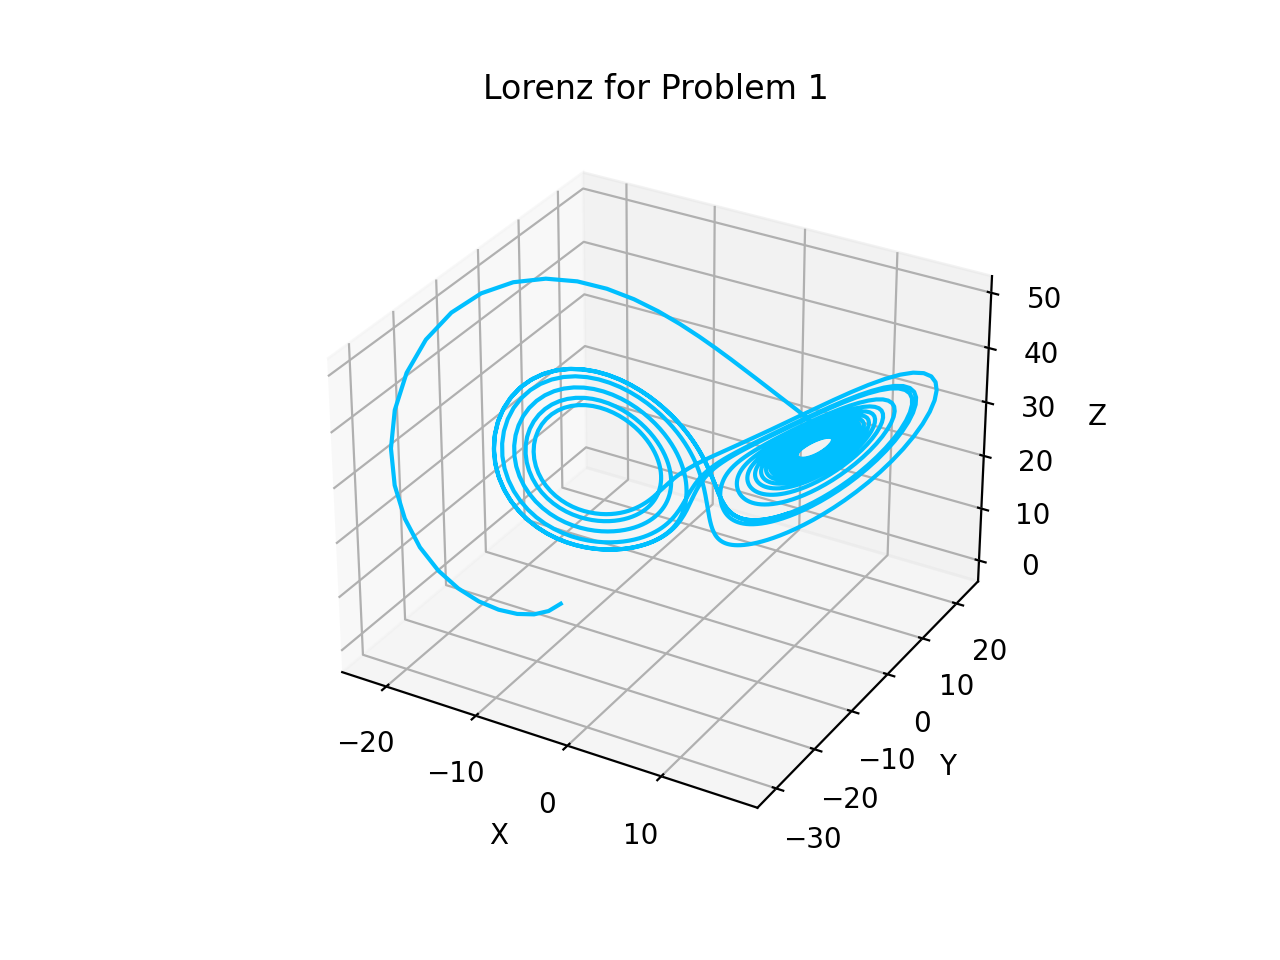

In [4]:
# Set initial data, time range, and solve the ODE
x0 = np.random.uniform(-15, 15, 3)
t = np.linspace(0, 20, 2000)
sol = odeint(lorenz, x0, t)

# Generate plot
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d", xlabel = "X", ylabel = "Y", zlabel = "Z")
ax.plot3D(sol[:, 0], sol[:, 1], sol[:, 2], color = "deepskyblue")
ax.set_title("Lorenz for Problem 1")
#ax.set_xlabel("X")
#ax.set_ylabel("Y")
#ax.set_zlabel("Z")
plt.show()

## Problem 2
To better visualize the Lorenz attractor, produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

<IPython.core.display.Javascript object>


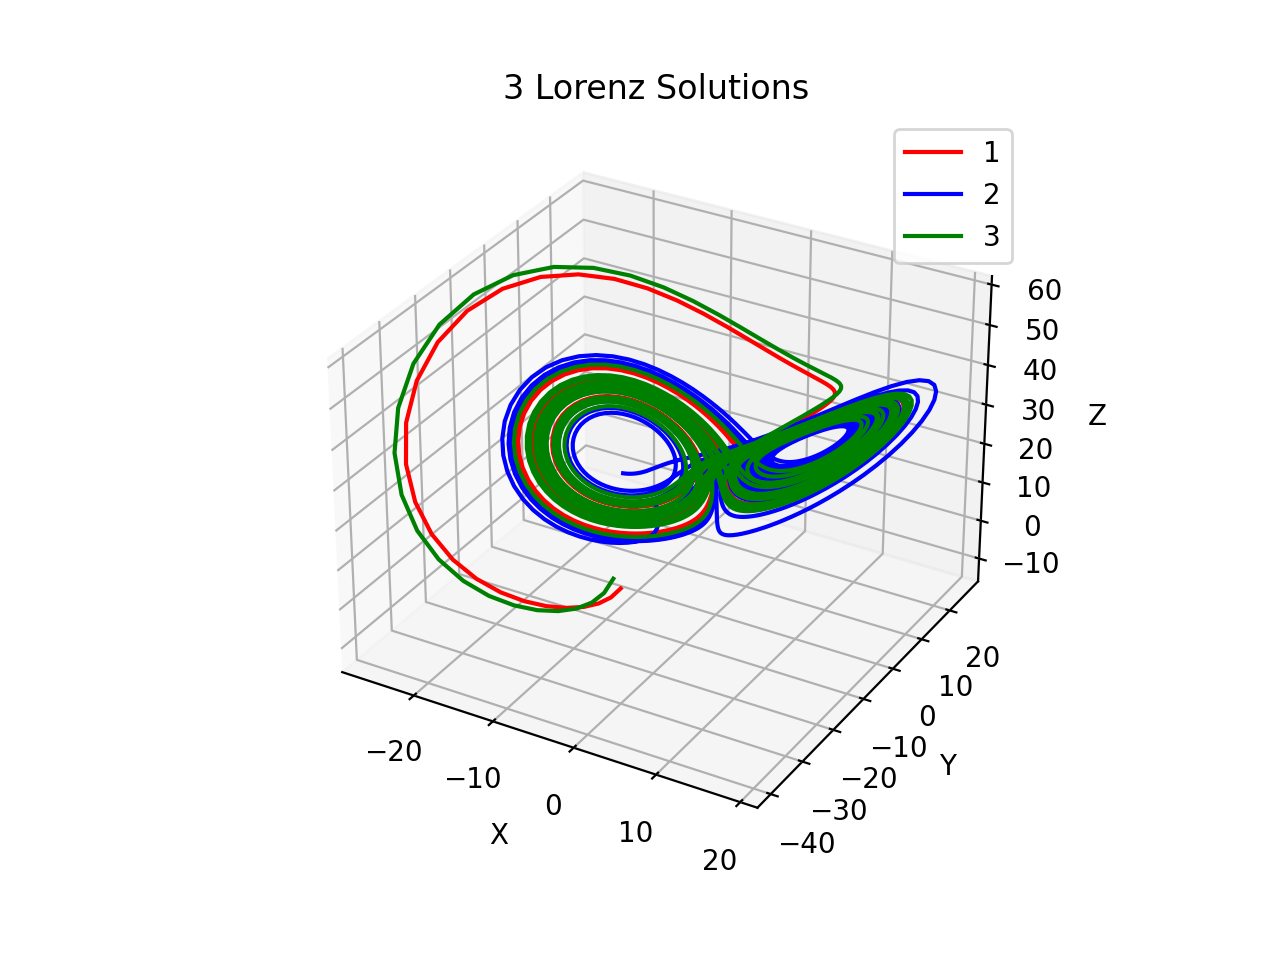

In [5]:
# Set initial data, t, and solve ODEs
initial_data, t = [np.random.uniform(-15, 15, 3) for i in range(3)], np.linspace(0, 20, 2000)
solutions = [odeint(lorenz, x, t) for x in initial_data]
xs, ys, zs = [sol[:, 0] for sol in solutions], [sol[:, 1] for sol in solutions], [sol[:, 2] for sol in solutions]

# Generate plot
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d", xlabel = "X", ylabel = "Y", zlabel = "Z")
for x, y, z, color, label in zip(xs, ys, zs, ["red", "blue", "green"], ["1", "2", "3"]):
    ax.plot3D(x, y, z, color = color, label = label)
ax.legend()
ax.set_title("3 Lorenz Solutions")
plt.show()

## Problem 3
Use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-10)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation should have a point marker and the past trajectory curve for each solution. Save your animation as `lorenz_animation1.mp4`.

(Recall that you can display the saved animation in a Jupyter notebook by running the follwing code in a markdown cell):

`<video src='lorenz_animation1.mp4' controls>`

In [9]:
# Set initial data, t, and solve ODEs
data1 = np.random.uniform(-15, 15, 3)
p = np.random.randn(3)*(1e-10)
data2, t = data1 + p, np.linspace(0, 50, 3000)
sol1, sol2 = odeint(lorenz, data1, t), odeint(lorenz, data2, t)
sol1x, sol1y, sol1z = sol1[:, 0], sol1[:, 1], sol1[:, 2]
sol2x, sol2y, sol2z = sol2[:, 0], sol2[:, 1], sol2[:, 2]

# Initialize plotting objects 
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d", xlabel = "X", ylabel = "Y", zlabel = "Z")
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_zlim(-10, 50)
sol1_par, = plt.plot([], [], [], marker = 'o', color = 'red', label = "original")
sol1_traj, = plt.plot([], [], [], color = 'red', alpha = 0.5)
sol2_par, = plt.plot([], [], [], marker = 'o', color = 'blue', label = "perturbed")
sol2_traj, = plt.plot([], [], [], color = 'blue', alpha = 0.5)
ax.legend()
ax.set_title("Perterbed Lorenz Solutions")

def update(i):
    """Update the coordinates"""
    sol1_par.set_data(sol1x[i], sol1y[i])
    sol1_traj.set_data(sol1x[:i+1], sol1y[:i+1])
    sol1_par.set_3d_properties(sol1z[i])
    sol1_traj.set_3d_properties(sol1z[:i+1])
    sol2_par.set_data(sol2x[i], sol2y[i])
    sol2_traj.set_data(sol2x[:i+1], sol2y[:i+1])
    sol2_par.set_3d_properties(sol2z[i])
    sol2_traj.set_3d_properties(sol2z[:i+1])
    return sol1_par, sol1_traj, sol2_par, sol2_traj

ani = animation.FuncAnimation(fig, update, frames = range(len(t)), interval = 50)
ani.save('lorenz_animation1.mp4')

<video src="lorenz_animation1.mp4" controls>

## Problem 4
The `odeint` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the odeint arguments `(atol=1e-15, rtol=1e-13)` for the first approximation and `(atol=1e-12, rtol=1e-10)` for the second.
As in the previous problem, use `FuncAnimation` to animate both solutions. Save the animation as `lorenz_animation2.mp4`.

In [11]:
# Set initial data, t, and solve ODEs
x0, t = np.random.uniform(-15, 15, 3), np.linspace(0, 50, 2000)
solutions = [odeint(lorenz, x0, t, atol = a, rtol = b) for a, b in zip([1e-15, 1e-12], [1e-13, 1e-10])]
sol1_coords, sol2_coords = [solutions[0][:, i] for i in range(3)], [solutions[1][:, i] for i in range(3)]

# Initialize plotting objects 
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d", xlabel = "X", ylabel = "Y", zlabel = "Z")
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_zlim(-10, 50)
sol1_par, = plt.plot([], [], [], marker = 'o', color = 'yellow', label = "atol=1e-15")
sol1_traj, = plt.plot([], [], [], color = 'yellow', linewidth = 2)
sol2_par, = plt.plot([], [], [], marker = 'o', color = 'blue', label = "atol=1e-12")
sol2_traj, = plt.plot([], [], [], color = 'blue', alpha = 0.5, linewidth = 1)
ax.legend()
ax.set_title("Lorenz Solution Error")

def update(i):
    """Update coordinates"""
    sol1_par.set_data(sol1_coords[0][i], sol1_coords[1][i])
    sol1_traj.set_data(sol1_coords[0][:i+1], sol1_coords[1][:i+1])
    sol1_par.set_3d_properties(sol1_coords[2][i])
    sol1_traj.set_3d_properties(sol1_coords[2][:i+1])
    sol2_par.set_data(sol2_coords[0][i], sol2_coords[1][i])
    sol2_traj.set_data(sol2_coords[0][:i+1], sol2_coords[1][:i+1])
    sol2_par.set_3d_properties(sol2_coords[2][i])
    sol2_traj.set_3d_properties(sol2_coords[2][:i+1])
    return sol1_par, sol1_traj, sol2_par, sol2_traj

ani = animation.FuncAnimation(fig, update, frames = range(len(t)), interval = 50)
ani.save('lorenz_animation2.mp4')

<video src="lorenz_animation2.mp4" controls>

## Problem 5
Estimate the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by using a random "dummy" initial condition, approximating the resulting solution to the Lorenz system for a short time, and then using the endpoint of that solution (which is now on the attractor) as the desired intital condition.
* Produce a second initial condition by adding a small perturbation to the first (as before).
* For both initial conditions, use `odeint` to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the vector difference between the two solutions for each value of $t$.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

Produce a plot similar to Figure 1.3 using `plt.semilogy`.

Hint: Remember that the best-fit line you calculated corresponds to a best-fit exponential for $||\delta(t)||$. If `a` and `b` are the slope and intercept of the best-fit line, the best-fit exponential can be plotted using `plt.semilogy(t,np.exp(a*t+b))`.

<IPython.core.display.Javascript object>


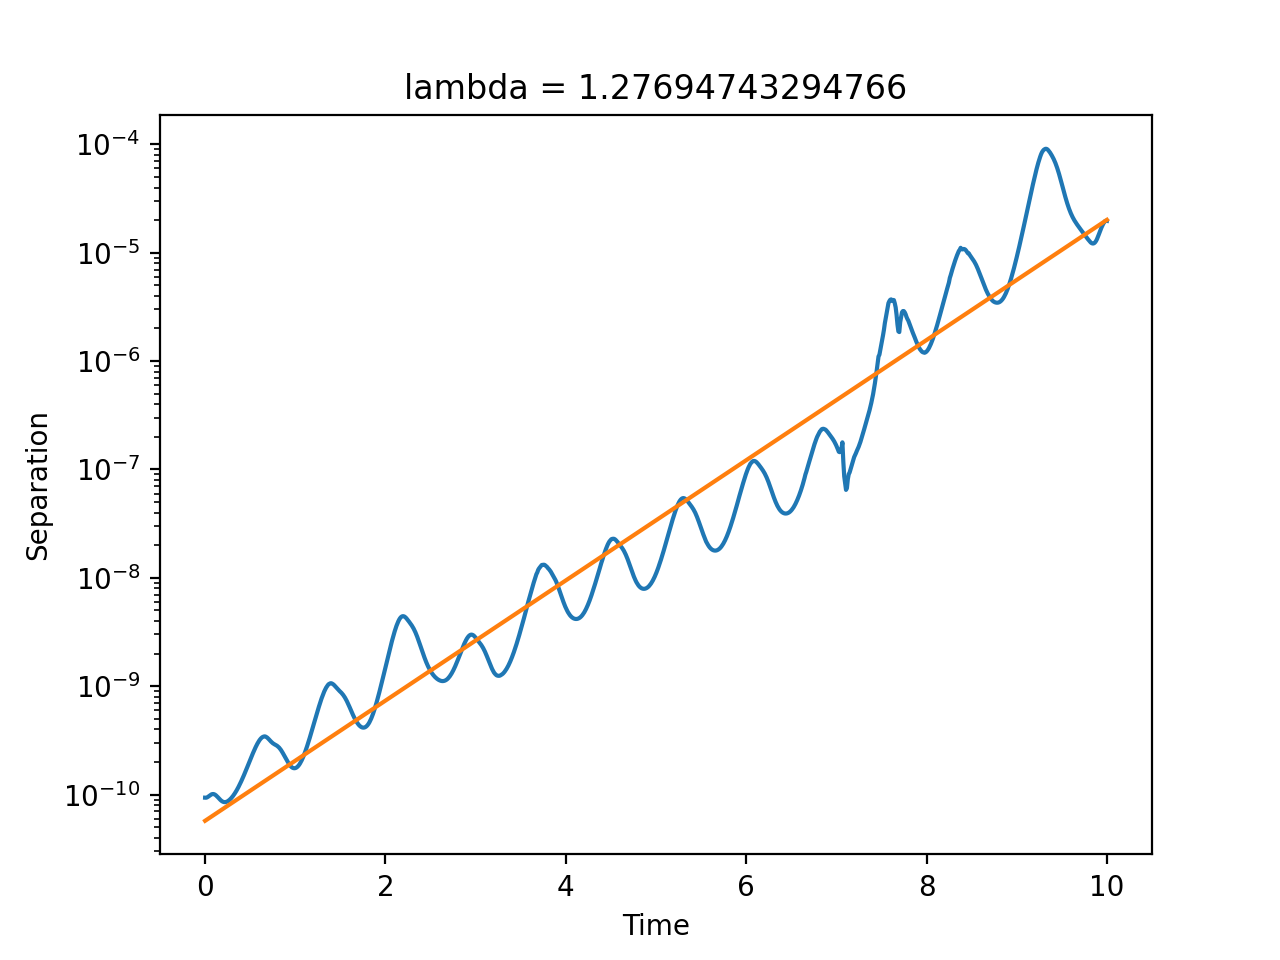

In [13]:
# Calculate initial condition
x0, t = np.random.uniform(-15, 15, 3), np.linspace(0, 1, 1000)
sol0 = odeint(lorenz, x0, t)
x1 = np.array([sol0[:, 0][-1], sol0[:, 1][-1], sol0[:, 2][-1]])
p = np.random.randn(3)*(1e-10)
x2 = x1 + p

# Set initial data, t, and solve ODEs
t = np.linspace(0, 10, 1000)
sol1, sol2 = odeint(lorenz, x1, t), odeint(lorenz, x2, t)
norm_dt = [np.linalg.norm(sol1[i, 0:3] - sol2[i, 0:3], ord = 2) for i in range(len(t))]
best_fit = linregress(t, np.log(norm_dt))

# Generate plot
plt.semilogy(t, norm_dt)
plt.semilogy(t, np.exp(best_fit.intercept + best_fit.slope*t))
plt.xlabel("Time")
plt.ylabel("Separation")
plt.title("lambda = " + str(best_fit.slope))
plt.show()